# Useful libraries

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


# Get the data

In [6]:
car_link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'

In [9]:
data = pd.read_csv(car_link, header=None)
data.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


# EDA and cleaning

Names of the columns are [buying, maint, doors, persons, lug_boot, safety, class values] where `class values` is the target represents the car evalution or acceptability.  
Let's change the columns names for more readability.

In [23]:
names = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "target"]

data.columns = names
data.head()

,buying,maint,doors,persons,lug_boot,safety,target
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [24]:
# What are the data types for each column ?
data.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
target      object
dtype: object

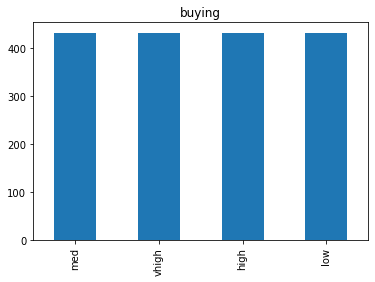

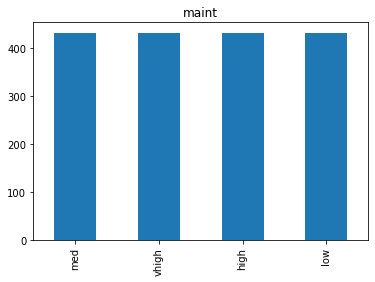

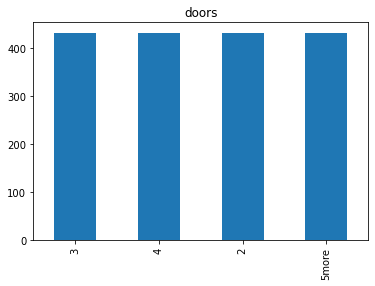

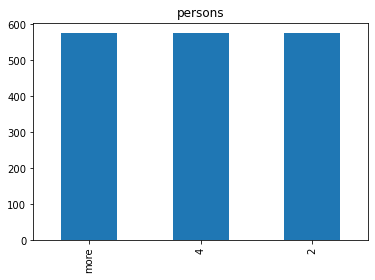

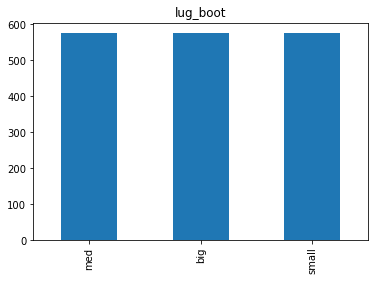

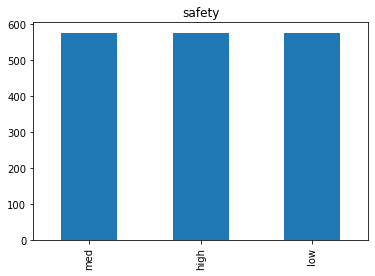

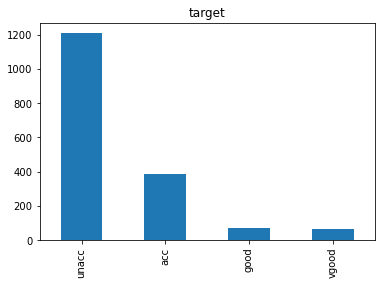

In [25]:
# And what are the values frequencies of values in each column ?

for column in data.columns:
    data[column].value_counts().plot(kind = 'bar')
    plt.title(column)
    plt.show()
    

While all classes in each each feature seem to be well balanced, our target value is quite unbalanced. This should be taken into consideration when splitting the data into training and testing by sampling with stratification based on the target.

In [28]:
# Any missing values?

pd.isna(data).any()

# Dataset looks complete

buying      False
maint       False
doors       False
persons     False
lug_boot    False
safety      False
target      False
dtype: bool

In [44]:
# buying

,buying,maint,doors,persons,lug_boot,safety,target
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [54]:
# Converting data into numerical values
# buying and maint columns
maint_buyin_mapper ={'low':0, 'med':1, 'high':2, 'vhigh':3}

data['buying'] = data.buying.map(maint_buyin_mapper)
data['maint'] = data.maint.map(maint_buyin_mapper)

In [64]:
# doors
data['doors'] = data.doors.map({"2":0, '3':1, '4':2, '5more': 3})

In [68]:
# persons
data['persons'] = data.persons.map({'2':0, '4':1, 'more':2})

In [72]:
# lug_boot
data['lug_boot'] = data.lug_boot.map({'small':0, 'med':1, 'big':2})

In [76]:
# safety
data['safety'] = data.safety.map({'low':0, 'med':1, 'high':2})

In [78]:
data.dtypes

buying       int64
maint        int64
doors        int64
persons      int64
lug_boot     int64
safety       int64
target      object
dtype: object

In [79]:
# Features and target separation
X = data.drop(columns= 'target')
y = data.target
X.head(), y.head()

(   buying  maint  doors  persons  lug_boot  safety
 0       3      3      0        0         0       0
 1       3      3      0        0         0       1
 2       3      3      0        0         0       2
 3       3      3      0        0         1       0
 4       3      3      0        0         1       1,
 0    unacc
 1    unacc
 2    unacc
 3    unacc
 4    unacc
 Name: target, dtype: object)

# Training and Test data sets

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 0)

In [81]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1209, 6) (1209,) (519, 6) (519,)


# Fitting

In [82]:
tree_clf = DecisionTreeClassifier(random_state=0)


In [85]:
cross_val_score(tree_clf, X_train, y_train)

array([0.97933884, 0.98347107, 0.98347107, 0.97933884, 0.94605809])

# Performance

In [90]:
tree_clf.score(X_test, y_test)

0.9710982658959537

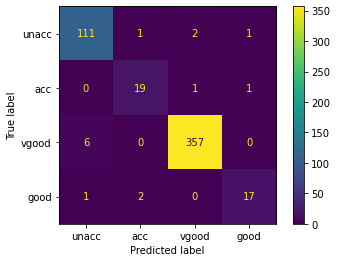

In [89]:
plot_confusion_matrix(tree_clf, X_test, y_test, display_labels=y_test.unique())

# Hyperparamater Tuning